Technion CS-236756 
## Introduction to Machine Learning
# Tutorial 1: Data Exploration with Python
***
Ronen Nir & Itay Evron

***

# Outline

* Motivation
* What is Data Exploration 
* Steps of Data Exploration
    * Variable Identification
    * Univariate Analysis
    * Bi-variate Analysis
* Examples

***

# Data Exploration Overview

- An approach to analyzing datasets to summarize their main characteristics
    - often with visual methods
- Aims to find what the data can tell us
    - Some patterns in the data can be revealed through visualizations and charts
- Using statistical methods to identify and test significant variables

***

# Motivation

- With a new dataset in hand, the first thing you do is data exploration

    - Data exploration and data preparation take up to 80% of the time dedicated to a machine learning project

- Sometimes we don't have a specific task
    - Exploring the data can give you some insights about what you can and cannot do

- Garbage in, garbage out
    - Exploring the data can help you make it better later on
    - *More data beats cleverer algorithms,  better data beats more data* 
        - (Peter Norvig)


***

# Data Exploration Steps

1. Understanding the data
    - Variable Identification
    - Variable Analysis
1. Improve the data
    - Missing values 
    - Outliers
    - Variable Engineering

***

# Packages Relevant to Data Exploration
First thing first, import relevant packages.

In [1]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library
import warnings
warnings.filterwarnings('ignore')

# Step I: Understanding the Data

Throughout this tutorial we shall use the "tips" dataset for demonstration 

In [2]:
tips = sns.load_dataset('tips')

In [3]:
# tips.shape
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


## Variable Identification

#### Discussion 
> What do we need to know about the variables in a given dataset?

## Variable Types

We focus on two types of variables:

1. Continuous variables (total_bill, tip)    
1. Categorical variables (sex, smoker, day, time)

### Discussion 
How would you treat 'size' variable?

In [4]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

***

## Faetures & Target Variables
* Target variables are what we care about, and we want to infer from the features (predictor variables)
* The features are often denoted as $X$ and target variables are denoted $y$

In [5]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
192,28.44,2.56,Male,Yes,Thur,Lunch,2
125,29.80,4.20,Female,No,Thur,Lunch,6
189,23.10,4.00,Male,Yes,Sun,Dinner,3
34,17.78,3.27,Male,No,Sat,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2


### Discussion 
what variables are the *predictor variables* and what variables are *target variables*?

***

## Data Understanding - Important Tip 
* Pandas assumes a certain variable type to each column
* Doublecheck it with the attribute `dtypes`

In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

***

# Univariate Analysis
* Univariate analysis is about exploring the variables one by one
* Continuous Variables
    * Use statistical metrics and visualization methods to understand the nature of the variable        
* Categorical Variables
    * Tables that describe distribution of each category

## Univariate Analysis (Continuous Variables)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

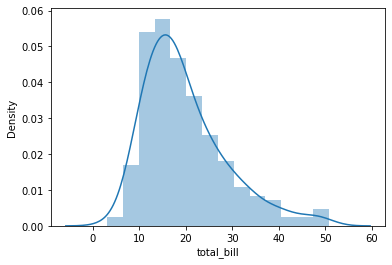

In [7]:
"""Visualization of Continuous Variables"""

# tips['total_bill'].plot()  # don't do that

# tips.total_bill.plot(kind='hist') # better

sns.distplot(tips.total_bill) # prettier with seaborn

## Univariate Analysis Examples (Categorical Variables)

In [8]:
# tips.total_bill.describe()

# tips.sex.value_counts()

# tips.day.value_counts()

## Univariate Analysis Examples (Visualization of Categorical Variables)

<AxesSubplot:xlabel='size', ylabel='count'>

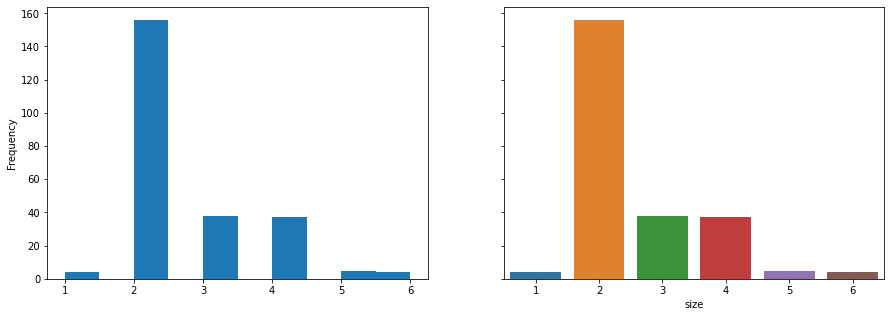

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
tips["size"].plot(kind="hist", ax=ax1)
sns.countplot(tips['size'], ax=ax2)  # prettier with seaborn

***

# Bi-variate Analysis
1. Explore the relationship between two variables
    1. continuous and continuous
    1. categorical and continuous
    1. categorical and categorical

***

## Bi-Variate Analysis of 2 Continuous Variables
1. Your first visualization of 2 variables should be a *scatter plot*
    1. KISS principle holds here 
1. Use statistical methods to check the relationship between two variables
    1. e.g. computing the correlation between 2 variables

In [10]:
# tips.plot(x='total_bill', y='tip', kind='scatter')
# sns.scatterplot(x='total_bill', y='tip', hue=tips.sex.to_list(), data=tips)

***

## Correlation
- Correlation aims to show whether and how strongly pairs of variables are *linearly* related 
    - For example, height and weight are related
- The Correlation between two variables (X,Y) is defined to be: $\frac{Cov(X,Y)}{\sqrt{Var(X) Var(Y)}}$

#### Discussion
> what will you do if you find two correlative variables?

<center><img src="img/corr.svg" width="750" height="750"/></center>


## Correlation in `tips` Dataset

In [11]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

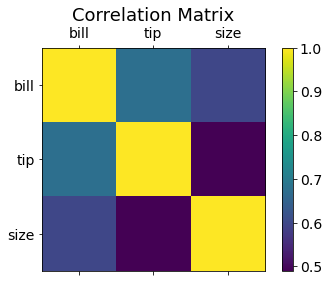

In [12]:
f = plt.figure()
plt.matshow(tips.corr(), fignum=f.number)
plt.xticks(range(3), ['bill', 'tip', 'size'], fontsize=14)
plt.yticks(range(3), ['bill', 'tip', 'size'], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=18)

***

## Bi-Variate Analysis of 2 Categorical Variables
1. Two-way table
1. Stacked Bar Chart
1. Chi-squared Test

## Examples of Bi-Variate Analysis in `tips`

In [13]:
# tips.groupby('time')['smoker'].value_counts(normalize=True)
# pd.crosstab(tips['time'], tips['smoker'])
# pd.crosstab(tips['time'], tips['smoker']).plot(kind='bar', stacked=True)

***

## Pearson's Chi-squared test $\chi ^{2}$ 
* A statistical test 
* Evaluates how likely it is that an observed difference between the events happened by chance

#### $$\chi^2 = \sum_{i=1}^n \frac{(O_i - E_i)^2}{E_i}$$

## Chi-squared test in `tips` Dataset

In [14]:
observed = pd.crosstab(tips['smoker'], tips['size'])
observed

size,1,2,3,4,5,6
smoker,,,,,,
Yes,2,66,12,11,2,0
No,2,90,26,26,3,4


* In `tips` it seems that large groups don't sit in the smokers section.

In [15]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(observed)

print(f"The test statistic: {chi2}")
print(f"The p-value of the test: {p}")
print(f"Degrees of freedom: {dof}")
# print(f"The expected frequencies:\n{expected}")

The test statistic: 5.664460853541009
The p-value of the test: 0.34024887997389514
Degrees of freedom: 5


***

## Bi-Variate Analysis of Categorical & Continuous Variables
* Use box plots

![title](img/boxplots.png)

## Box Plots in `tips`

In [16]:
# tips.boxplot(by='time', column='tip', grid = False)
# tips.boxplot(by='day', column='tip', grid = False)

***

## (Bonus) Creating New Variables
* Use expert/common knowledge to improve the data 
* E.g. Humans like round numbers so customers tend to give a tip that fills the gap to a round number
> Can we design a variable that emphasizes this?

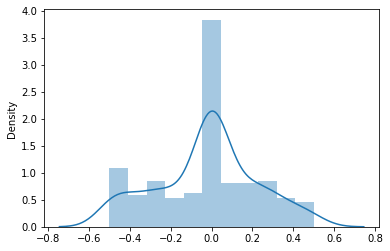

In [17]:
bill_with_tip = tips['total_bill'] + tips['tip']
sns.distplot(bill_with_tip - np.round(bill_with_tip))
tips['res'] = np.ceil(tips['total_bill']) - tips['total_bill']
# tips.head()

## (Bonus) Solving the Regression Problem 

In [18]:
# converting the categorical variables to one-hot columns
tips = pd.concat([tips, pd.get_dummies(tips["smoker"],prefix="smoker")], axis=1)
tips = pd.concat([tips, pd.get_dummies(tips["day"],prefix="day")], axis=1)
tips = pd.concat([tips, pd.get_dummies(tips["sex"],prefix="sex")], axis=1)
tips.drop(labels=['smoker', 'time', 'day', 'sex'], axis=1, inplace=True)

tips.head()

,total_bill,tip,size,res,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,sex_Male,sex_Female
0,16.99,1.01,2,0.01,0,1,0,0,0,1,0,1
1,10.34,1.66,3,0.66,0,1,0,0,0,1,1,0
2,21.01,3.50,3,0.99,0,1,0,0,0,1,1,0
3,23.68,3.31,2,0.32,0,1,0,0,0,1,1,0
4,24.59,3.61,4,0.41,0,1,0,0,0,1,0,1


In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Y = tips['tip']
X = tips.loc[:, (tips.columns!='tip')]

# splitting the dataset to train an test subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [20]:
# initiating a linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

print(regr.coef_)

[ 0.07428796  0.16975364  0.26269156 -0.09271516  0.09271516  0.00258782
  0.18354555 -0.16303016 -0.02310321 -0.04861102  0.04861102]


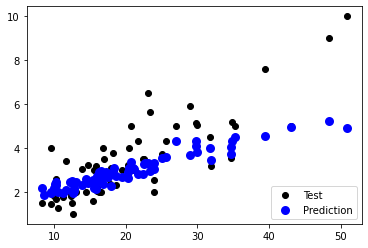

In [21]:
# putting the model to the test
test_plt = plt.scatter(X_test['total_bill'], y_test,  color='black', cmap='test')
pred_plt = plt.scatter(X_test['total_bill'], pred, color='blue', linewidth=3, cmap='prediction')
plt.legend((test_plt, pred_plt), ('Test', 'Prediction'), loc='lower right')